<a href="https://colab.research.google.com/github/Ak042003/VLG_AI_IMAGE_DETECTION/blob/main/vlgcode_Copy_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import os
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import cv2 as cv
import csv
import glob
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
import keras
import pathlib
from keras.preprocessing.image import ImageDataGenerator
import sklearn
from sklearn.model_selection import train_test_split
import torchvision


In [48]:
df_train = pd.read_csv(r"train.csv")
df_test = pd.read_csv(r"test.csv")
print("For Train dataset")
print("Total Number of columns :",len(df_train.columns))
print("Number of columns with atleast 1 null value :",len(df_train.columns[df_train.isna().any()]))
print("For Test dataset")
print("Total Number of columns :",len(df_test.columns))
print("Number of columns with atleast 1 null value :",len(df_test.columns[df_test.isna().any()]))

For Train dataset
Total Number of columns : 1201
Number of columns with atleast 1 null value : 0
For Test dataset
Total Number of columns : 1201
Number of columns with atleast 1 null value : 0


Since we don't have any **null values**, we're good to go ! & don't need to remove any rows.

In [49]:
df_train.head()

,labels,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,0,-2.033875,0.978446,-0.142131,-0.177117,-1.470684,1.669562,-0.196530,-0.125239,-0.452284,...,-1.111266,0.716084,0.060039,0.301279,-1.174846,-1.076498,-0.069452,-0.604012,-2.179176,0.558003
1,1,-0.348835,0.294815,-0.557577,-2.020773,-1.234715,1.633930,-1.680658,-0.358146,0.166122,...,0.735240,0.829781,1.521941,1.347946,0.754505,1.330642,-0.754453,0.582956,0.252671,1.495870
2,1,0.113248,-0.607726,-0.947791,0.830851,0.998291,0.498321,-1.493958,0.789572,-1.311018,...,0.104698,0.616189,-1.035953,2.111387,-0.984415,1.148076,-1.433554,0.243372,0.170083,1.274795
3,0,1.223321,-0.479048,-1.925789,1.680377,0.021840,-1.453307,0.605559,-0.019024,1.065448,...,0.360237,-1.957863,-0.123384,1.505329,0.660290,-1.769443,-0.547756,-0.568122,0.244645,0.982116
4,0,0.160109,0.422684,-0.308029,0.227744,0.432854,0.608348,0.193832,1.035091,-0.538868,...,0.416629,1.441766,0.212572,-0.994721,1.143999,-2.166923,-1.199248,-1.028636,0.752791,0.317169


In [50]:
df_train.describe()

,labels,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
count,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,...,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000
mean,0.266667,0.385453,0.086769,0.317084,0.400414,0.093063,0.173532,-0.174072,-0.074659,-0.135957,...,0.417874,-0.405061,0.091497,-0.276132,-0.133123,-0.156475,-0.096026,0.372260,-0.222551,0.006532
std,0.442259,0.929075,0.898979,0.969380,0.954504,0.968625,0.895351,1.001566,0.906168,0.972163,...,0.941354,1.054231,0.958970,0.989820,1.042036,1.019384,0.913732,0.944429,0.973640,0.897006
min,0.000000,-3.462941,-3.605773,-4.078232,-3.344323,-3.613712,-3.319666,-3.627701,-3.528635,-4.503662,...,-3.684054,-3.385650,-3.162629,-3.022903,-3.698249,-4.791005,-3.356509,-3.933762,-4.174752,-3.624981
25%,0.000000,-0.286854,-0.470281,-0.379984,-0.290078,-0.644337,-0.392807,-0.980593,-0.677763,-0.914803,...,-0.254776,-1.265848,-0.594289,-1.054700,-1.009256,-0.833164,-0.684567,-0.301254,-1.010557,-0.564394
50%,0.000000,0.598422,0.071867,0.518698,0.653512,0.141549,0.237502,-0.180645,-0.159631,-0.108885,...,0.648944,-0.489479,0.192821,-0.301887,-0.139792,-0.197277,-0.156927,0.612440,-0.241763,-0.008017
75%,1.000000,1.108212,0.609769,1.085552,1.135854,0.950304,0.747622,0.621790,0.450741,0.627055,...,1.131876,0.366639,0.779280,0.409370,0.740059,0.493094,0.434146,1.109200,0.508097,0.552090
max,1.000000,3.439295,3.581171,3.991985,3.900672,3.488667,3.193113,3.062756,3.877255,3.017000,...,4.077517,3.550058,3.790435,3.907684,3.777545,3.269490,3.526907,3.542401,3.642856,3.718869


Number of real images : 1400 , 26.67 %
Number of fake images : 3850 , 73.33 %


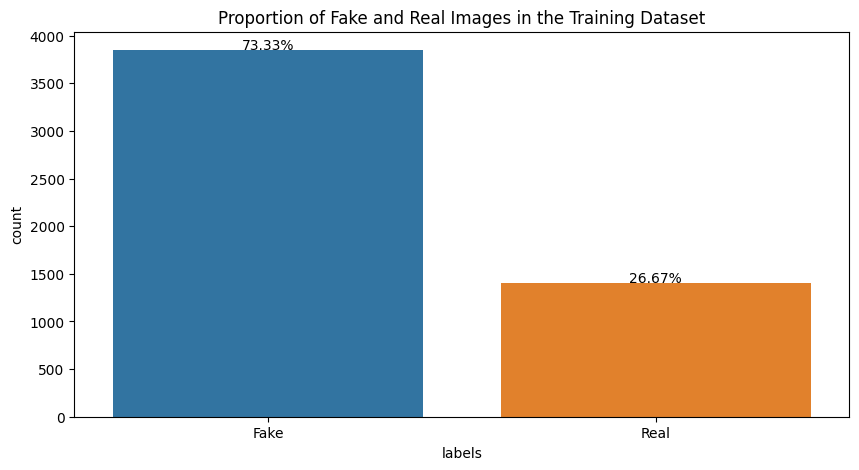

In [51]:
print("Number of real images :",df_train["labels"][df_train["labels"]==1].count(),",",'{:1.2f}'.format(100*df_train["labels"][df_train["labels"]==1].count()/df_train["labels"].count()),"%")
print("Number of fake images :",df_train["labels"][df_train["labels"]==0].count(),",",'{:1.2f}'.format(100*df_train["labels"][df_train["labels"]==0].count()/df_train["labels"].count()),"%")

fig,ax=plt.subplots(1,1,figsize=(10,5),sharey=True)
sns.countplot(x=df_train["labels"]).set(xticklabels=["Fake","Real"],title="Proportion of Fake and Real Images in the Training Dataset")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height + 8,'{:1.2f}%'.format(100*height/5250),ha="center")

In [54]:
y_train = df_train.iloc[:,0]
x_train = df_train.iloc[:,1:]
print(y_train.shape)
print(x_train.shape)

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.3,random_state=0)

(5250,)
(5250, 1200)


In [55]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)

LGBMClassifier()

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x = x_train , y = y_train , epochs = 25)

In [56]:
x_test = df_test.iloc[:,1:]
print(len(x_test))

2250


In [58]:
real=0
df= pd.DataFrame(columns=['id', 'label'])
print(df)
for i in range(len(x_test)):
    if(clf.predict(x_test[i:i+1])<0.5):
        df=pd.concat([df, pd.DataFrame([{'id': i+1, 'label': 0}])], ignore_index=True)
        print("Fake")
    else:
        df=pd.concat([df, pd.DataFrame([{'id': i+1, 'label': 1}])], ignore_index=True)
        real+=1
        print("Real")

fake=2250-real
print(real)
print(fake)

Empty DataFrame
Columns: [id, label]
Index: []
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Real
Fake
Fake
Fake
Fake
Fake
Real
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Real
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Real
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Real
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Real
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Real
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Real
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Real
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fake
Fak

In [60]:
df.to_csv(r"submission.csv",index=False)